In [120]:
import os
import time

from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [121]:
# Tensorboard utils
current_dir = os.getcwd()
tensorboard_dir = os.path.join(current_dir, "tensorboard")


def get_tensorboard_log_dir():
    return os.path.join(tensorboard_dir, time.strftime("run_%Y_%m_%d-%H_%M_%S"))

In [122]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [123]:
# Scale and change dtype of data
X_train = X_train[:] / 255.0
X_test = X_test[:] / 255.0

In [124]:
def build_model(hidden_layers=1, neurons_per_layer=300, learning_rate=0.01, input_shape=(28, 28)):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for layer in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(
        optimizer=SGD(learning_rate=learning_rate),
        loss=sparse_categorical_crossentropy,
        metrics=["accuracy"]
    )
    return model

In [125]:
model = build_model(input_shape=X_train[0].shape)
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.1,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        TensorBoard(get_tensorboard_log_dir(), profile_batch=0)
    ])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 7s 138us/sample - loss: 0.6485 - accuracy: 0.8386 - val_loss: 0.3159 - val_accuracy: 0.9172

In [126]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06588891311609187, 0.9791]

Text(0.5, 1.0, 'Learning Curve')

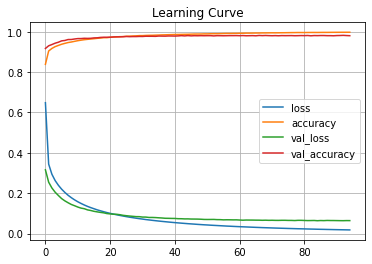

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid()
plt.legend()
plt.title("Learning Curve")